# Bristol Airbnb Listing: Price Prediction

Introduction

Airbnb is a broker who arranges short term lodgings between hosts and guests which is operated on Airbnb’s website and mobile application. Many hosts on Airbnb are not doing hospitality business, they are just renting out their living space. Hence, they don’t know much of the insight and knowledge about lodging. Accordingly, assistance is needed so that these hosts stay competitive, especially in term of pricing. Therefore, this analysis seeks to build a model that taken different attributes such as bedrooms, location, house type, and others, to predict the price that is an optimal price which isn't too expensive that it drives guests away to other properties, or too cheap that it is not profitable to the host.

This analysis shows details step and coding of how to build such a prediction model from beginning to end. First, the data is examined to gain both an overview and an in-depth understanding of the dataset. Then, the business problem is framed, followed by data cleaning and visualization. Next step is building and validating models. Afterward, the best model is selected and evaluated.

# Exploring Data

The first activity is to examine Bristol Airbnb Dataset to see its structure, attribute data types, null, overview statistics of all features. Also, examples of instances from the top and bottom of the table are also viewed. Then, an examination of each attribute to see its value is performed. 

In [1]:
# import basic packages.
import numpy as np
import pandas as pd

In [2]:
# read data.
airbnb = pd.read_csv("C://Users//DELL//Desktop//Strathclyde 2018-2019//Classes//S2-CS 986 Machine Learning//Assignment//BristolAirbnbListings.csv")

In [3]:
# overviewing data.
airbnb.describe()
airbnb.info()
airbnb.isnull().sum()
airbnb.head()
airbnb.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 28 columns):
id                                2375 non-null int64
name                              2375 non-null object
host_id                           2375 non-null int64
host_name                         2375 non-null object
neighbourhood                     2375 non-null object
postcode                          2326 non-null object
latitude                          2375 non-null float64
longitude                         2375 non-null float64
property_type                     2375 non-null object
room_type                         2375 non-null object
accommodates                      2375 non-null object
bathrooms                         2372 non-null object
bedrooms                          2372 non-null object
beds                              2372 non-null object
price                             2375 non-null int64
minimum_nights                    2375 non-null int64
number_of_revie

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
2370,30082974,Chandos House room 5,225389090,James,Cotham,BS6 6PF,51.468820,-2.602978,House,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,177
2371,30083433,Chandos House room 6,225389090,James,Cotham,BS6 6PF,51.468602,-2.604548,House,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,177
2372,30083976,Chandos House room 7,225389090,James,Cotham,BS6 6PF,51.467852,-2.603493,House,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,177
2373,30097167,Lawford Apartments,226145538,Nie,Lawrence Hill,BS2 0DH,51.457777,-2.579308,Casa particular (Cuba),Entire home/apt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
2374,30099927,Small and cosy double room in Totterdown,7773760,Dee,Windmill Hill,BS4 3BX,51.442131,-2.572238,House,Private room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,347


In [4]:
# looking into each attributes
airbnb['property_type'].value_counts()
airbnb['room_type'].value_counts()
airbnb['accommodates'].value_counts()
airbnb['bathrooms'].value_counts()
airbnb['bedrooms'].value_counts()
airbnb['number_of_reviews'].value_counts()
airbnb['review_scores_value'].value_counts()

10.0    1190
9.0      701
8.0      108
6.0       15
7.0       14
4.0        4
2.0        2
0.0        1
Name: review_scores_value, dtype: int64

It is found that the dataset contains Airbnb listing properties’ names, type, room type, hostname, host id, longitude and latitude, price, guest review data, and review scores in various categories. There are 2375 records and a total of 28 attributes, 13 floats and integers, and 15 strings.

Moreover, there are many unusual records in property_type, accommodates, bathrooms, bedrooms, beds, price, number_of_reviews, reviews_per_month, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin columns. For example, there are Private room, Entire home/apt, City of Bristol, Guesthouse, Apartment records in accommodates column, rather accommodatable number of people in the property.


# Frame the problem

After exploring and studying the dataset, it is time to start structuring the problem and designing the model. To begin with, the business objective of this report is to build a model that predicts the price of property on Airbnb. The model should take provided data such as a number of people the property can accommodate, location, property type, and others, to predict the price. This model will help hosts find the optimal price for their listing property.

Regarding the business objective and the data provided, the model should be a supervised model which performing a regression task. It is also a univariate regression problem since it is expected to predict only one value for each listing property. Lastly, because it is a regression task, RMSE will be used to measure a model’s performance.


# Cleaning Data

According to the exploration in the earlier step, some data are not making sense in many columns, such as Private room records in accommodates column.  These unusual records are obstructing the analysis and should be removed. 

In [5]:
# drop rows that have unusal data.
airdrop = airbnb[(airbnb['accommodates'] <> 'Private room')& (airbnb['accommodates'] <> 'Entire home/apt') & (airbnb['accommodates'] <> 'City of Bristol')& (airbnb['accommodates'] <> 'Guesthouse')&(airbnb['accommodates'] <> 'Apartment')]
airdrop = airbnb[(airbnb['property_type'] <> 't')&(airbnb['property_type'] <> 'f') & (airbnb['property_type'] <> '-2.5851114426') & (airbnb['property_type'] <> '-2.6102001818') & (airbnb['property_type'] <> 'Clifton')]
airdrop = airdrop[(airbnb['price'] <> 0)]

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Moreover, price, bathrooms, bedrooms and beds columns contain Nan values which must be dropped from the dataset as well.

In [6]:
# drop row that containts NAN in bathrooms/bedrooms/beds/price columns.
airdrop = airdrop.dropna(subset = ['beds', 'bedrooms', 'bathrooms', 'price'])

Furthermore, there are still Nan values in number_of_reviews, last_review, reviews_per_month, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value columns. It is assumed that instances that have Nan in these columns are newly listed. They haven’t been reviewed by their guests or even haven’t been booked. Since these NAN should be filled with 0 rather than drop off like above NAN.

In [7]:
#fill in 0 to cell that is Nan in review related columns.
airfill = airdrop.fillna(0, inplace=False)

Lastly, data in accommodates, bathroom, bedrooms, beds, and rating, accuracy, cleanliness, checkin columns are a string object. They are in number form and supposed to be number type. Hence data type conversion is performed to convert object datatype to float data type.

In [8]:
# convert object to float.
airfill['accommodates'] = airfill['accommodates'].astype('float')
airfill['bathrooms'] = airfill['bathrooms'].astype('float')
airfill['bedrooms'] = airfill['bedrooms'].astype('float')
airfill['beds'] = airfill['beds'].astype('float')
airfill['review_scores_rating'] = airfill['review_scores_rating'].astype('float')
airfill['review_scores_accuracy'] = airfill['review_scores_accuracy'].astype('float')
airfill['review_scores_cleanliness'] = airfill['review_scores_cleanliness'].astype('float')
airfill['review_scores_checkin'] = airfill['review_scores_checkin'].astype('float')

# Data Visualising

Visualisation is part of an exploration process which helps identify outliers, needed transformation or help generate new insight about the data. It is also a handy tool for geographic information. 

Histogram

First, histograms are created to show how each attribute is distributed.

In [9]:
# histogram of all data
import matplotlib.pyplot as plt

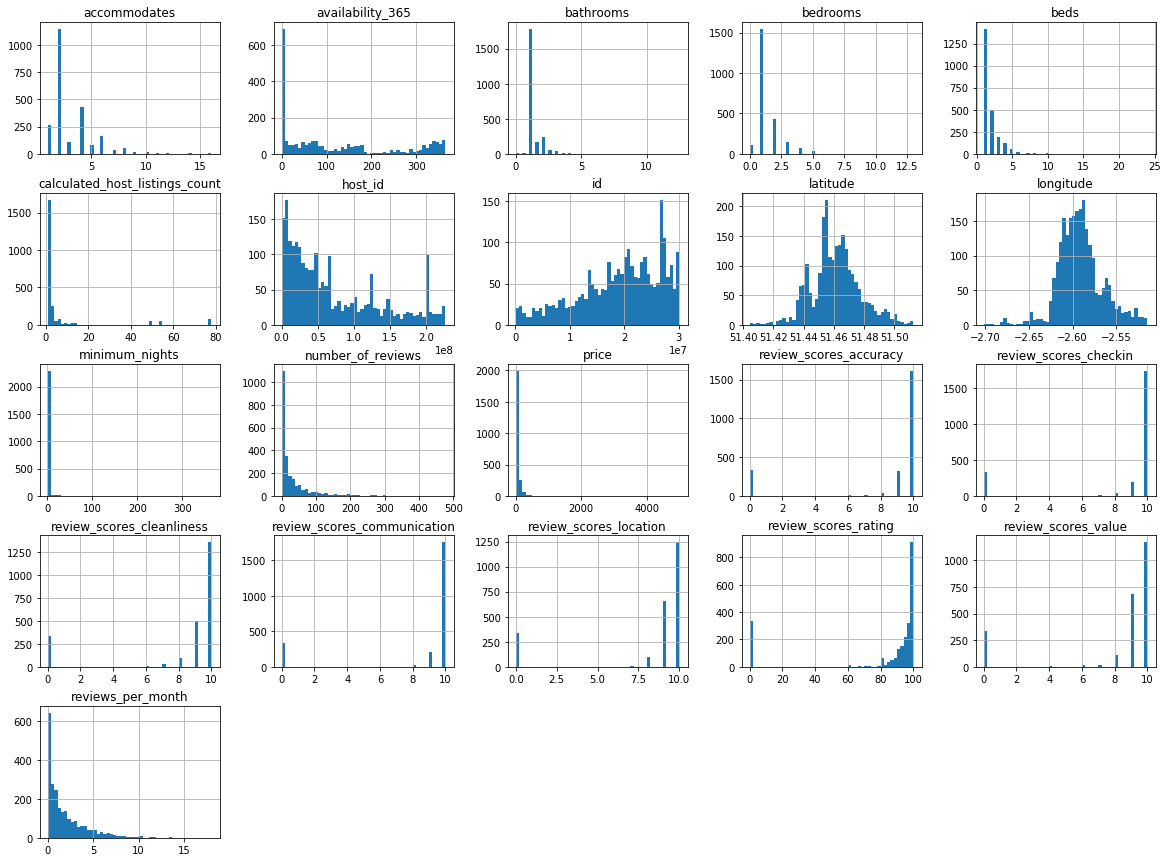

In [10]:
# seeing distibution of data of each attributes
%matplotlib inline
airfill.hist(bins = 50, figsize = (20,15))
plt.show()

The histograms show that data of all attributes are skewed. Id, latitude, longitude, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value attributes are right-skewed distribution which means that their means are more than their median.

On the other hands, other columns are left-skewed distribution which means that their means are less than their median.

It is also noticeable that the ranges of data across attributes are not the same, some range from 0-10, while others are 0-100.


Plot Geographical data

Since latitude and longitude data are provided in the dataset, it is worth to plot the data to visualise the location and its associated price.

Text(0.5,1,'Geographical scatter plot of location and price')

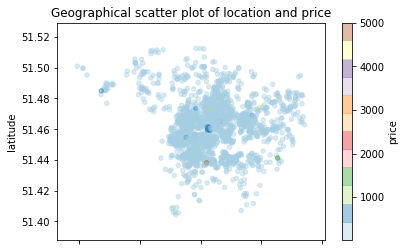

In [11]:
# plot latitude and longitude vs. price
airfill.plot(kind = "scatter", x = 'longitude', y='latitude', alpha = 0.4, c= 'price', cmap = 'Paired', colorbar = True)
plt.title ( "Geographical scatter plot of location and price")

Calculating correlation coefficient and creating scatter plot

Last part of visualization is looking into the correlation between attributes and creating scatter plots to show relationship and spot outliers in the data.

First, the correlation matrix of price, the target of analysis, is calculated against other attributes. 

In [12]:
# corelation of attributes
corr_airfill = airfill.corr()
corr_airfill['price'].sort_values(ascending = False)

price                             1.000000
beds                              0.508138
accommodates                      0.479295
bedrooms                          0.437025
bathrooms                         0.333737
availability_365                  0.100382
id                                0.072596
host_id                           0.021467
calculated_host_listings_count    0.009794
minimum_nights                   -0.012110
latitude                         -0.029584
longitude                        -0.065763
number_of_reviews                -0.071469
reviews_per_month                -0.071806
review_scores_location           -0.074647
review_scores_cleanliness        -0.076584
review_scores_rating             -0.080812
review_scores_checkin            -0.081713
review_scores_communication      -0.083259
review_scores_accuracy           -0.092769
review_scores_value              -0.099815
Name: price, dtype: float64

Next, the correlation between attributes is plotted. However, as there are 28 attributes which are bigger than the display window, only those high correlation attributes beds, accommodates, bedrooms, and bathrooms attributes are plotted.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DDB8E48>,
      dtype=object)

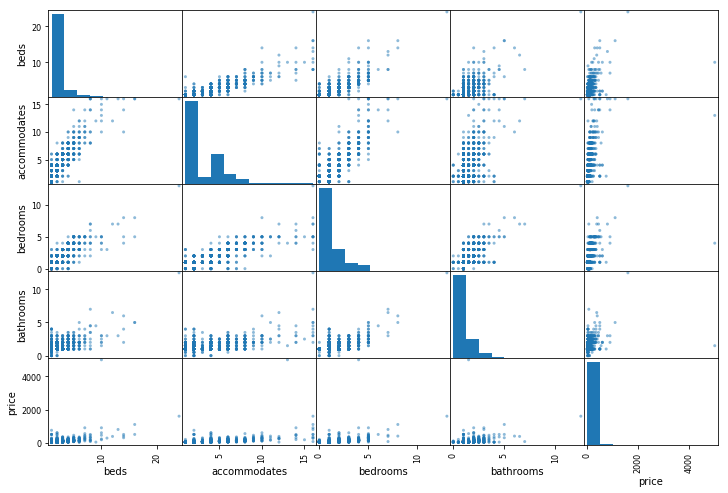

In [13]:
from pandas.plotting import scatter_matrix
attributes = ['beds', 'accommodates','bedrooms', 'bathrooms', 'price']
scatter_matrix(airfill[attributes], figsize = (12 , 8))

The plots show that they are linear relationships between prices and beds, accomodates, bedrooms, and bathrooms attributes. It also reveals the possibility of an outlier. Hence, a closer look of each plot is created to examine the outlier. 

Text(0.5,1,'Relationship between bathrooms and price')

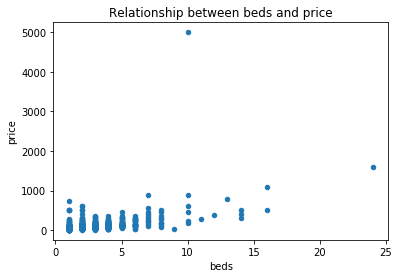

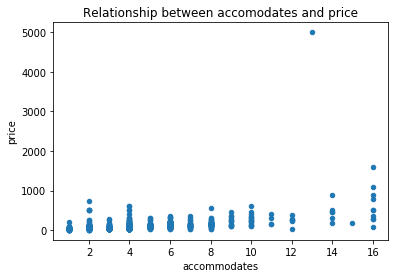

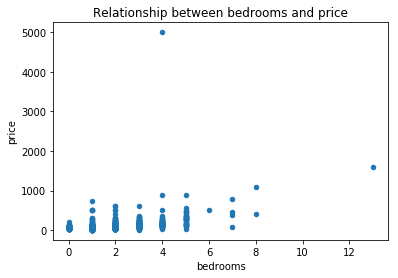

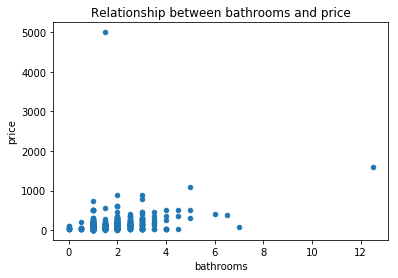

In [14]:
# Zoom in to see each plot
airfill.plot(kind = "scatter", x = 'beds', y = 'price')
plt.title ( "Relationship between beds and price")
airfill.plot(kind = "scatter", x = 'accommodates', y = 'price')
plt.title ( "Relationship between accomodates and price")
airfill.plot(kind = "scatter", x = 'bedrooms', y = 'price')
plt.title ( "Relationship between bedrooms and price")
airfill.plot(kind = "scatter", x = 'bathrooms', y = 'price')
plt.title ( "Relationship between bathrooms and price")

A closer look at the plots reveal 2 outliers which sit far apart from other data points, they are the points with the price value of 5000 and 1600.  

# Cleaning Data

Outliers

The visualization performed in the previous step revealed 2 outliers. Outliers can drastically change the results of data analysis and modeling. For example, it increases the error variance and reduces the power of statistical tests. Accordingly, they should be removed before modeling.

In [15]:
# cleaning removing outliers found in the previous step.
airfill = airfill[(airbnb['price'] <> 5000)& (airbnb['price'] <> 1600)]

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Categorical attributes

Moreover, there are 2 categorical attributes, property_type and room_type which haven’t been processed yet. Machine learning prefers to work with a number rather than text. Hence these must be converted into numerical categorical and put back to the dataframe before further processing.

In [16]:
# covcert room_type to numerical category
room_type = airfill['room_type']
room_type_encoded, room_categories = room_type.factorize()
room_type_encoded[:10]
room_categories
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
room_cat_1hot = encoder.fit_transform(room_type_encoded.reshape(-1,1))
room_cat_1hot
room_cat_1hot_array  = room_cat_1hot.toarray()
room_cat_1hot_array

C:\Anaconda2\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [17]:
# add new encoded room_type category data to the dataframe
enc_room_data = pd.DataFrame(room_cat_1hot.toarray())
enc_room_data.columns = room_categories
enc_room_data.index =airfill.index 
airfill_room = airfill.join(enc_room_data)

In [18]:
# covcert property_type to numerical category
prop_type = airfill['property_type']
prop_type_encoded, prop_categories = prop_type.factorize()
prop_type_encoded[:10]
prop_categories
encoder_prop = OneHotEncoder()
prop_cat_1hot = encoder_prop.fit_transform(prop_type_encoded.reshape(-1,1))
prop_cat_1hot
prop_cat_1hot_array  = prop_cat_1hot.toarray()
prop_cat_1hot_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [19]:
# add new encoded room_type category data to the dataframe
enc_prop_data = pd.DataFrame(prop_cat_1hot.toarray())
enc_prop_data.columns = prop_categories
enc_prop_data.index =airfill_room.index 
air_prep = airfill_room.join(enc_prop_data)

In [20]:
# the new data fram with numerical categories of room_type and property_type is named air_prep
air_prep.head()

,id,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,...,Bungalow,Tent,Boat,Hotel,Cottage,Camper/RV,"Shepherd's hut (U.K., France)",Boutique hotel,Farm stay,Casa particular (Cuba)
0,70820,City View - Sarah's double room.,360195,Sarah,Windmill Hill,BS3 4,51.439942,-2.591726,Townhouse,Private room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,117122,City Centre - Waterside Retreat,591555,Marcus,Clifton,BS8 4UJ,51.450512,-2.610536,Apartment,Private room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,146407,Sunny Central Artist Cottage (Dbl),708175,Orla,Southville,BS3,51.441308,-2.602706,Townhouse,Private room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,176306,The White Room - Central Bristol Art House Ga...,708175,Orla,Bedminster,0,51.441006,-2.601208,Townhouse,Private room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,220956,"Light, Modern, 1st Floor Apartment.",1145941,Stephen,Bedminster,England,51.438517,-2.601421,Apartment,Entire home/apt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Creating train set and test set using stratified sampling

The last step before modeling is to separate data for model training and model testing. Stratified sampling is used rather than random sampling to ensure that both training and testing samples represent the whole population and prevent sampling bias which could happen when the dataset is not large, like the air_pred data after cleaning.

Firstly, air_pred data is divided into 4 subgroups by accommodates attribute. The attribute is used to split groups for its high correlation to price and suffice quantities of data after group division.

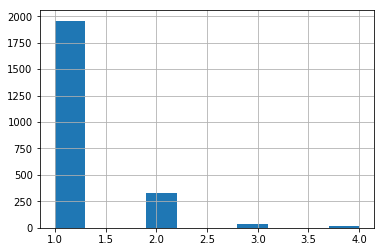

In [21]:
# divided dataset into groups for stratification.
air_prep['accommodates_cat'] = np.ceil(air_prep['accommodates']/4)
air_prep['accommodates_cat'].hist()

After that, the subgroups are sampled proportionally. 

In [22]:
# stratified sampling 
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(air_prep, air_prep['accommodates_cat']):
    strat_train_set = air_prep.loc[train_index]
    strat_test_set = air_prep.loc[test_index]

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


The proportion of each accommodates subgroup of the train set, test set, and full cleaned data are very similar.

In [23]:
# reviewing stratify test set, train set and comparing with original
print strat_test_set['accommodates_cat'].value_counts()/len(strat_test_set)
print strat_train_set['accommodates_cat'].value_counts()/len(strat_train_set)
print air_prep['accommodates_cat'].value_counts()/len(air_prep)

# drop accommodate cat off from train, test set
strat_train_set.drop('accommodates_cat', axis = 1, inplace = True)
strat_test_set.drop('accommodates_cat', axis = 1, inplace = True)

1.0    0.805970
2.0    0.155650
3.0    0.014925
4.0    0.004264
Name: accommodates_cat, dtype: float64
1.0    0.829151
2.0    0.134544
3.0    0.016551
4.0    0.006941
Name: accommodates_cat, dtype: float64
1.0    0.835611
2.0    0.140478
3.0    0.017079
4.0    0.006832
Name: accommodates_cat, dtype: float64


# Building and Evaluating Model

Preprocessing:

Before going to training and evaluating a model, first, create a copy of the training set so that any change during training won’t affect the original training set. Then, separate predictors and labels of the training set, also drop object attributes which are not used in regression models in this step. 

In [24]:
# create a copy of train set to do train
train =strat_train_set.copy()

# drop na from test set
train.dropna(0, how = 'any', inplace = True)

In [82]:
# seperate predictors and labels
# drop price and all other non numerical data
train_var = train.drop(['price','id', 'name', 'host_id', 'host_name', 'neighbourhood', 'postcode', 'property_type', 'room_type','last_review'] ,axis = 1)
train_lab = train['price']

Next is to standardise the features of predictors in the training set. The standardisation is a necessary step as regression algorithms are not working well when ranges of data are highly different. The predictors of training set has high variation in range, for example, accommodates feature ranges from 1 to 16, while review_score rating ranges from 0 to 100. 

In [26]:
# prepare predictor for training
# feature scaling, some algorithm can't work well if the rnge of each attribute are highly different.
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
train_var[['latitude', 'longitude','beds', 'accommodates', 'bedrooms', 'bathrooms', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value', 'calculated_host_listings_count', 'availability_365']] = std_scaler.fit_transform(train_var[['latitude', 'longitude','beds', 'accommodates', 'bedrooms', 'bathrooms', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value', 'calculated_host_listings_count', 'availability_365']])

Modeling and Evaluating models

Various models can be used to predict numerical numbers. However, none of them guarantees to work better than others. To find the best model for any analysis, it is essential to try the algorithms and evaluate them. Accordingly, a few regression models will be built and evaluate using cross-validation technique. 

The cross validation technique allows the algorithm to utilise training data fully. Moreover, it gives not only an estimated performance of the model but also how precise the estimation is.

After that, the learning curve of the train set and validation set will be plotted observe the model behavior if it is overfitted or underfitted.

In [27]:
# run data set and calculate rmse
from sklearn.metrics import mean_squared_error

# trying cross-validation
from sklearn.model_selection import cross_val_score


In [28]:
# code to display cross validation's scores
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

In [29]:
# plot learning curve
from sklearn.model_selection import train_test_split


# create learning curve
def plot_learning_curves(model, X, y): # be careful the X and Y here
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size =0.2)
    train_errors, val_errors = [], []
    for m in range (1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 4, label = "val")
    plt.legend(loc = 'upper right', fontsize = 14)
    plt.xlabel ('Training set size', fontsize = 14)
    plt.xlabel ('RMSE', fontsize = 14)

Linear Regression

The first model to train is linear regression. Linear regression is one of the simplest models which can predict a quantitative variable from one or more predictor variables.


In [30]:
# linear regression 
from sklearn.linear_model import LinearRegression

In [31]:
# linear regression training
lin_reg = LinearRegression()
lin_reg.fit(train_var, train_lab)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# linear regression rmse
from sklearn.metrics import mean_squared_error
lin_train_prediction = lin_reg.predict(train_var)
lin_mse = mean_squared_error(train_lab, lin_train_prediction)
lin_rmse = np.sqrt(lin_mse)
print lin_mse
print lin_rmse

2269.3502026380847
47.637697285218195


In [33]:
# linear regression cross validation
lin_scores = cross_val_score(lin_reg, train_var, train_lab, scoring ="neg_mean_squared_error", cv = 10)
lin_rmse_score = np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

('scores:', array([50.21766342, 65.50497665, 63.47859481, 35.10918984, 29.29351284,
       46.29543924, 72.81551228, 33.57145781, 66.66259501, 31.31178433]))
('mean:', 49.426072622032095)
('standard deviation:', 15.812605587429202)


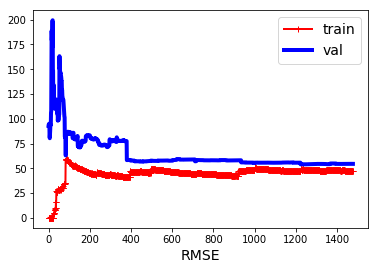

In [34]:
# plot learning curve 
plot_learning_curves(lin_reg, train_var, train_lab)

Decision Tree Regression

Next model is decision tree. It is a very useful algorithm for fitting complex dataset.

In [35]:
# train decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [36]:
# decision tree regression training
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_var, train_lab)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [66]:
# decision tree regression rmse
tree_train_prediction = tree_reg.predict(train_var)
tree_mse = mean_squared_error(train_lab, tree_train_prediction)
tree_rmse = np.sqrt(tree_mse)
print tree_mse
print tree_rmse

704.4045429962142
26.540620621911128


In [67]:
# decision tree regression cross validation
tree_scores = cross_val_score(tree_reg, train_var, train_lab, scoring ="neg_mean_squared_error", cv = 10)
tree_rmse_score = np.sqrt(-tree_scores)
display_scores(tree_rmse_score)

('scores:', array([63.74421012, 68.01160473, 38.5337339 , 67.2066599 , 55.04921631,
       66.35714182, 65.98009528, 46.06200287, 66.9073583 , 35.6878831 ]))
('mean:', 57.353990633308534)
('standard deviation:', 12.060975221731535)


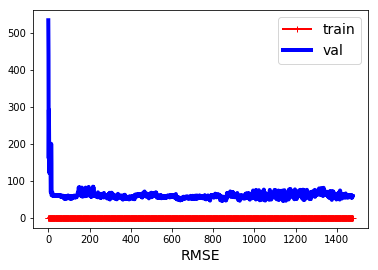

In [39]:
# plot learning curve 
plot_learning_curves(tree_reg, train_var, train_lab)

Support Vector Machines Regression

Another model is Support Vector Machine. It is a very versatile algorithm which can perform both classification and regression tasks, and it also supports both linear and non linear regression.

In [40]:
# train svm regressor
from sklearn.svm import LinearSVR

In [41]:
# svm regression training
svm_reg = LinearSVR(epsilon = 5)
svm_reg.fit(train_var, train_lab)

LinearSVR(C=1.0, dual=True, epsilon=5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [42]:
# svm regression rmse
svm_train_prediction = svm_reg.predict(train_var)
svm_mse = mean_squared_error(train_lab, svm_train_prediction)
svm_rmse = np.sqrt(svm_mse)
print svm_mse
print svm_rmse

2891.072826379213
53.768697458458234


In [43]:
# svm regression cross validation
svm_scores = cross_val_score(svm_reg, train_var, train_lab, scoring ="neg_mean_squared_error", cv = 10)
svm_rmse_score = np.sqrt(-svm_scores)
display_scores(svm_rmse_score)

('scores:', array([47.25265863, 80.58357432, 51.62766958, 40.00270675, 25.85139366,
       49.3422669 , 80.62222274, 38.12203812, 66.40648158, 29.02563159]))
('mean:', 50.88366438772734)
('standard deviation:', 18.463966336135023)


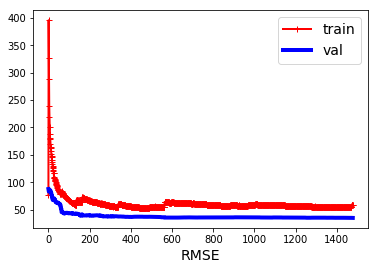

In [44]:
# plot learning curve 
plot_learning_curves(svm_reg, train_var, train_lab)

Random Forest Regression

Last model to train is Random Forest  Regression which is an ensemble of Decision Trees. It is suitable for solving complex questions like this case. 

In [45]:
# train random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [93]:
# random forest regression training
forest_reg = RandomForestRegressor()
forest_reg.fit(train_var, train_lab)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [47]:
# Random forest regression rmse

forest_train_prediction = forest_reg.predict(train_var)
forest_mse = mean_squared_error(train_lab, forest_train_prediction)
forest_rmse = np.sqrt(forest_mse)
print forest_mse
print forest_rmse

389.12656571119527
19.726291230517592


In [48]:
# random forest regression cross validation
forest_scores = cross_val_score(forest_reg, train_var, train_lab, scoring ="neg_mean_squared_error", cv = 10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

('scores:', array([38.50542749, 63.75850977, 34.96851866, 52.06853436, 33.26723329,
       42.31164494, 68.56517121, 27.8564525 , 58.65732737, 27.70919444]))
('mean:', 44.76680140171981)
('standard deviation:', 14.225717103202221)


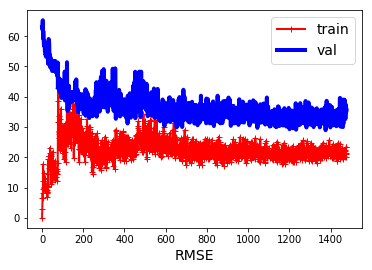

In [49]:
# plot learning curve
plot_learning_curves(forest_reg, train_var, train_lab)

# Interpreting result and selecting model 

RMSE is the measure of error all 4 model performance. The lower the RMSE means, the lower the prediction error. Moreover, learning curves of training and validating set are also plotted to observe overfitting and underfitting of the regression.

The linear regression’s RMSE from a single validation is 47.637y, and cross-validation is 49.4260 +/- 15.81. Very close RMSE scores and learning curves, plus quite low RMSE score as the 2nd lowest among 4 models, suggest that this model is an acceptable model.

The decision tree regression has a single validation RMSE score of 26.5406 and cross-validation RMSE score of 57.3539 +/- 12.06. The low score of a single validation but a high score of cross-validation suggest that the decision tree is overfitting. Furthermore, the far better performance of training data in the learning curves confirms the conclusion.

The support vector machines’ approximate RMSE for a single validation is 53.7687, and cross-validation is 50.8836 +/- 18.46. Both single and cross-validation RMSE score are quite similar but are on a higher side suggest that SVM model may be underfitted. The learning curves that are quite close, have reached a plateau when training set size is big, and quite high RMSE also support the argument.

The random forest regression has a single validation’s RMSE score of 19.7263 and cross validation’s RMSE score of 44.7668 +/- 14.23. The RMSE of random forest is the best among 4 models. Moreover, the training curve of training data is close to validation data  leads to the conclusion that random forest is the best model.

In conclusion, Random forest model is the final model. It is best model as it provides the  lowest RMSE score which means the prediction error of this model is the lowest among 4 models. Moreover, its single and cross-validation’s RMSE scores and both learning curves are also very similar which hint that the model isn’t overfitted or underfitted.

The final model is Random forest regression. Its regression's variables and their importance are:

In [72]:
print train_var.columns
attributes = ['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms','beds', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value', 'calculated_host_listings_count','availability_365', 'Private room', 'Entire home/apt','Shared room', 'Townhouse', 'Apartment', 'House', 'Guesthouse','Bed and breakfast', 'Barn', 'Loft', 'Hostel', 'Condominium','Guest suite', 'Cabin', 'Other', 'Tiny house','Serviced apartment', 'Yurt', 'Hut', 'Bungalow', 'Tent', 'Boat','Hotel', 'Cottage', 'Camper/RV', "Shepherd's hut (U.K., France)",'Boutique hotel', 'Farm stay', 'Casa particular (Cuba)']
sorted(zip(forest_reg.feature_importances_, attributes), reverse=True)

Index([u'latitude', u'longitude', u'accommodates', u'bathrooms', u'bedrooms',
       u'beds', u'minimum_nights', u'number_of_reviews', u'reviews_per_month',
       u'review_scores_rating', u'review_scores_accuracy',
       u'review_scores_cleanliness', u'review_scores_checkin',
       u'review_scores_communication', u'review_scores_location',
       u'review_scores_value', u'calculated_host_listings_count',
       u'availability_365', u'Private room', u'Entire home/apt',
       u'Shared room', u'Townhouse', u'Apartment', u'House', u'Guesthouse',
       u'Bed and breakfast', u'Barn', u'Loft', u'Hostel', u'Condominium',
       u'Guest suite', u'Cabin', u'Other', u'Tiny house',
       u'Serviced apartment', u'Yurt', u'Hut', u'Bungalow', u'Tent', u'Boat',
       u'Hotel', u'Cottage', u'Camper/RV', u'Shepherd's hut (U.K., France)',
       u'Boutique hotel', u'Farm stay', u'Casa particular (Cuba)'],
      dtype='object')


[(0.2335746037297976, 'beds'),
 (0.16415352569671623, 'accommodates'),
 (0.12594123463569448, 'bedrooms'),
 (0.10959892951955649, 'availability_365'),
 (0.04888967825422582, 'reviews_per_month'),
 (0.04561148644420777, 'Private room'),
 (0.039954752073994085, 'longitude'),
 (0.037696872119817856, 'calculated_host_listings_count'),
 (0.034923924743431596, 'latitude'),
 (0.02633288488721531, 'Entire home/apt'),
 (0.0248339356351071, 'Boat'),
 (0.018730661638530988, 'bathrooms'),
 (0.018246316833572616, 'minimum_nights'),
 (0.015022660034528592, 'Serviced apartment'),
 (0.0132031550065445, 'number_of_reviews'),
 (0.010572512123063023, 'review_scores_rating'),
 (0.00603407071686516, 'Apartment'),
 (0.004021103909574167, 'review_scores_value'),
 (0.0034723121399821387, 'review_scores_communication'),
 (0.0033213224120485904, 'review_scores_accuracy'),
 (0.0028536706182671263, 'Townhouse'),
 (0.002790959758359186, 'review_scores_location'),
 (0.002449493354924974, 'Yurt'),
 (0.00186557737087

# Evaluating final model 

Before final evaluation of the model against test set, a copy of test set should be created. Then process test set in the same way train set was processed earlier. Finally, evaluate model against test set.

In [51]:
# create a copy of test set and process test set 
test =strat_test_set.copy()

In [61]:
# Process test set as done with train set
test.dropna(0, how = 'any', inplace = True)
test_var = test.drop(['price','id', 'name', 'host_id', 'host_name', 'neighbourhood', 'postcode', 'property_type', 'room_type','last_review'] ,axis = 1)
test_lab = test['price']

In [62]:
test.dropna(0, how = 'any', inplace = True)

In [63]:
test_var[['latitude', 'longitude','beds', 'accommodates', 'bedrooms', 'bathrooms', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value', 'calculated_host_listings_count', 'availability_365']] = std_scaler.fit_transform(test_var[['latitude', 'longitude','beds', 'accommodates', 'bedrooms', 'bathrooms', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value', 'calculated_host_listings_count', 'availability_365']])

In [68]:
# test final model
final_model = forest_reg
X_test = test_var
y_test = test_lab
final_prediction = final_model.predict(X_test)
final_mse =mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
print final_mse
print final_rmse

1871.3972608695651
43.259649338264005


# Conclusion and Reccommendation

The final model for predicting price of property on Airbnb is random forest regression model.

The model has test RMSE score of 43.2596. Though it is relatively high considered that price’s mean is 78 and the median is 59. However, it is the best among 4 models. Since the model is still lacking, fine tuning model is reccomended for a better performance. Lastly, Airbnb hosts can use this to predict the price by feeding attributes data to model.